In [54]:
#Script simples que exibe os preços de fechamento

In [55]:
!pip install yfinance --upgrade --no-cache-dir
!pip install fbprophet

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


In [56]:
#Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

from fbprophet import Prophet

Importa yahoo finance e sobreescreve panda data reader


In [57]:
import yfinance as yf
yf.pdr_override()

In [58]:
#obtendo dados do mercado
df = web.get_data_yahoo('EGIE3.SA')

[*********************100%***********************]  1 of 1 completed


In [59]:
df_ret = df

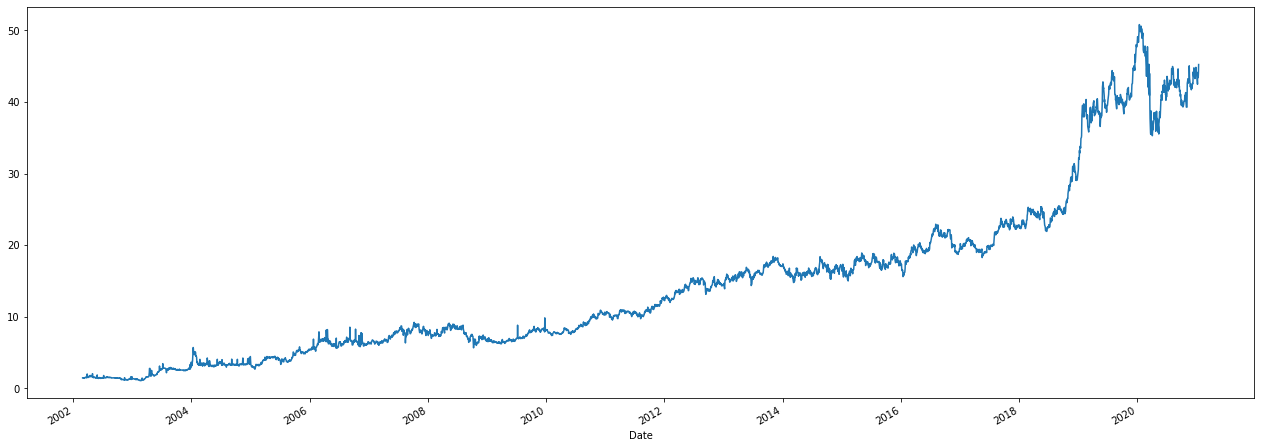

In [60]:
#Imprimindo o gráfico
df['Adj Close'].plot(figsize=(22,8));

In [61]:
model = Prophet()

In [62]:
df = df.reset_index()

In [63]:
df[['ds', 'y']] = df[['Date', 'Adj Close']]

In [64]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [65]:
future = model.make_future_dataframe(periods=10)

In [66]:
forecast = model.predict(future)

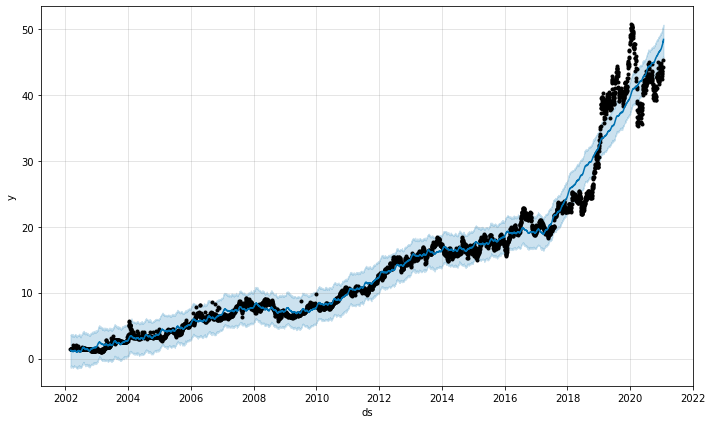

In [67]:
model.plot(forecast)
plt.show()

In [68]:
model_ret = Prophet()

In [69]:
df_ret = df_ret.reset_index()

In [70]:
#Usando para os retornos
df_ret['Retornos'] = df_ret['Adj Close'].pct_change(1)

In [71]:
df_ret[['ds', 'y']] = df_ret[['Date', 'Retornos']]

In [72]:
df_ret = df_ret.dropna()

In [73]:
model_ret.fit(df_ret)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [84]:
future = model_ret.make_future_dataframe(periods=1)

In [85]:
forecast = model_ret.predict(future)

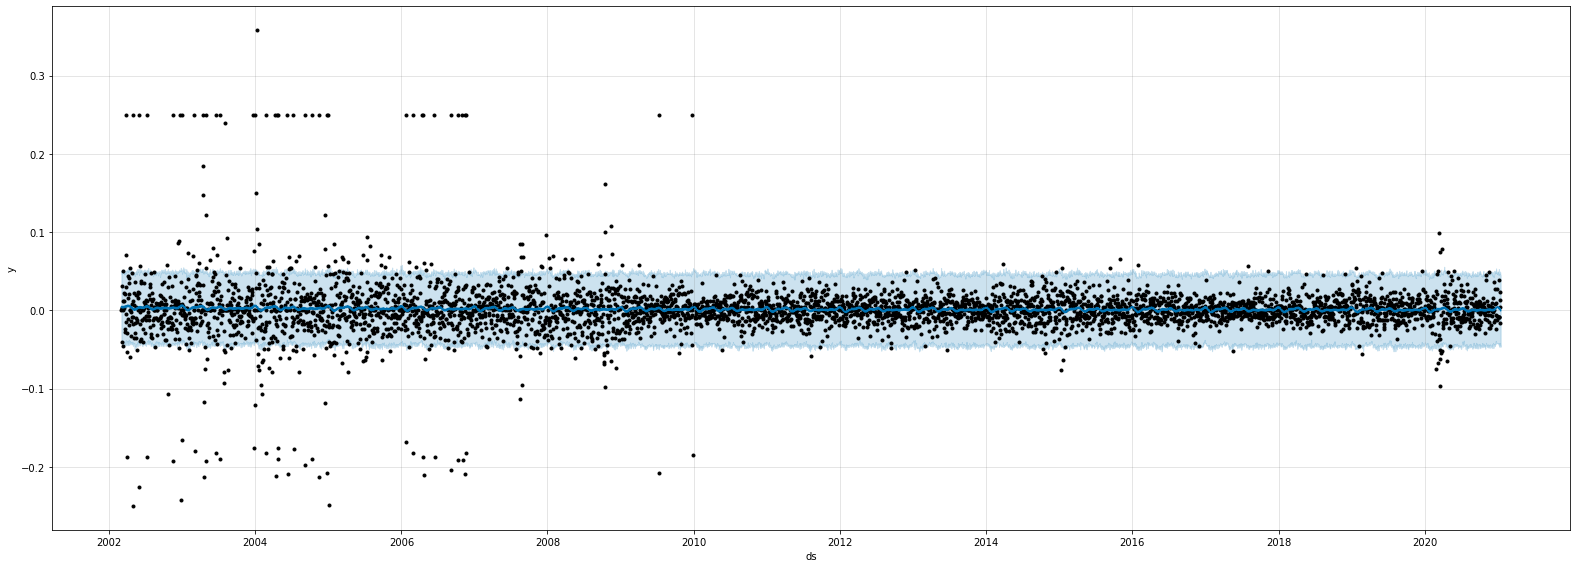

In [86]:
model_ret.plot(forecast, figsize=(22,8))
plt.show()

In [87]:
df_ret

,Date,Open,High,Low,Close,Adj Close,Volume,Retornos,ds,y
1,2002-03-04,3.200000,3.200000,3.040000,3.200000,1.442524,158,0.000000,2002-03-04,0.000000
2,2002-03-05,3.160000,3.240000,3.072000,3.072000,1.384823,144,-0.040000,2002-03-05,-0.040000
3,2002-03-06,3.136000,3.160000,3.072000,3.080000,1.388429,449,0.002604,2002-03-06,0.002604
4,2002-03-07,3.080000,3.224000,3.048000,3.088000,1.392035,148,0.002598,2002-03-07,0.002598
5,2002-03-08,3.200000,3.216000,3.096000,3.184000,1.435311,79,0.031088,2002-03-08,0.031088
...,...,...,...,...,...,...,...,...,...,...
4711,2021-01-08,42.669998,44.299999,42.500000,44.130001,44.130001,1132600,0.038842,2021-01-08,0.038842
4712,2021-01-11,44.139999,44.259998,43.009998,43.400002,43.400002,1257100,-0.016542,2021-01-11,-0.016542
4713,2021-01-12,43.500000,43.820000,42.959999,43.599998,43.599998,1422900,0.004608,2021-01-12,0.004608
4714,2021-01-13,43.830002,44.369999,43.410000,44.180000,44.180000,874000,0.013303,2021-01-13,0.013303


In [88]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-03-04,0.002726,-0.038311,0.050429,0.002726,0.002726,0.001422,0.001422,0.001422,0.000668,0.000668,0.000668,0.000755,0.000755,0.000755,0.0,0.0,0.0,0.004149
1,2002-03-05,0.002726,-0.039285,0.046959,0.002726,0.002726,0.001435,0.001435,0.001435,0.000688,0.000688,0.000688,0.000748,0.000748,0.000748,0.0,0.0,0.0,0.004161
2,2002-03-06,0.002725,-0.038734,0.050738,0.002725,0.002725,0.002442,0.002442,0.002442,0.001704,0.001704,0.001704,0.000738,0.000738,0.000738,0.0,0.0,0.0,0.005167
3,2002-03-07,0.002724,-0.039761,0.050368,0.002724,0.002724,0.000684,0.000684,0.000684,-0.000043,-0.000043,-0.000043,0.000727,0.000727,0.000727,0.0,0.0,0.0,0.003408
4,2002-03-08,0.002723,-0.043892,0.052245,0.002723,0.002723,0.000428,0.000428,0.000428,-0.000289,-0.000289,-0.000289,0.000717,0.000717,0.000717,0.0,0.0,0.0,0.003151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711,2021-01-11,0.000028,-0.045441,0.047133,0.000028,0.000028,0.001866,0.001866,0.001866,0.000668,0.000668,0.000668,0.001198,0.001198,0.001198,0.0,0.0,0.0,0.001894
4712,2021-01-12,0.000028,-0.041596,0.049669,0.000028,0.000028,0.001589,0.001589,0.001589,0.000688,0.000688,0.000688,0.000901,0.000901,0.000901,0.0,0.0,0.0,0.001617
4713,2021-01-13,0.000028,-0.046359,0.048161,0.000028,0.000028,0.002297,0.002297,0.002297,0.001704,0.001704,0.001704,0.000593,0.000593,0.000593,0.0,0.0,0.0,0.002325
4714,2021-01-14,0.000028,-0.044880,0.045724,0.000028,0.000028,0.000236,0.000236,0.000236,-0.000043,-0.000043,-0.000043,0.000279,0.000279,0.000279,0.0,0.0,0.0,0.000263
